<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Thinking1-什么是反向传播中的链式法则" data-toc-modified-id="Thinking1-什么是反向传播中的链式法则-1">Thinking1 什么是反向传播中的链式法则</a></span></li><li><span><a href="#Thinking2-请列举几种常见的激活函数，激活函数有什么作用" data-toc-modified-id="Thinking2-请列举几种常见的激活函数，激活函数有什么作用-2">Thinking2 请列举几种常见的激活函数，激活函数有什么作用</a></span><ul class="toc-item"><li><span><a href="#sigmoid" data-toc-modified-id="sigmoid-2.1">sigmoid</a></span></li><li><span><a href="#tanh" data-toc-modified-id="tanh-2.2">tanh</a></span></li><li><span><a href="#relu" data-toc-modified-id="relu-2.3">relu</a></span></li></ul></li><li><span><a href="#Thinking3-利用梯度下降法训练神经网络，发现模型loss不变，可能有哪些问题？怎么解决？" data-toc-modified-id="Thinking3-利用梯度下降法训练神经网络，发现模型loss不变，可能有哪些问题？怎么解决？-3">Thinking3 利用梯度下降法训练神经网络，发现模型loss不变，可能有哪些问题？怎么解决？</a></span></li></ul></div>

## Thinking1 什么是反向传播中的链式法则
在神经网络反向传播中，我们需要对损失函数进行求导，然后将导数值传到上一步，进行隐藏层的权值更新。对于层层嵌套的复合函数求导，该复合函数的导数，可用构成复合函数的各个函数的导数乘积来表示。最终得到结果对于输入层的导数，即输入和输出波动的比率。这就是复合函数求导的链式法则。

## Thinking2 请列举几种常见的激活函数，激活函数有什么作用
激活函数有Sigmoid, tanh, ReLU, ELU, LeakyReLU等等，激活函数在神经网络中的作用主要是把线性函数的输出结果进行非线性的转换，将原本无边界的线性函数映射到有边界的范围内，输入给下一层。

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def plot_function(f):
    x = np.arange(-5,5,0.1)
    y = f(x)
    plt.figure()
    plt.plot(x,y)
    plt.show()

### sigmoid
- 计算量大
- 容易出现梯度消失的情况

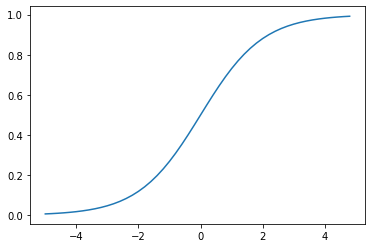

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
plot_function(sigmoid)

### tanh
- 也有可能出现梯度消失的情况

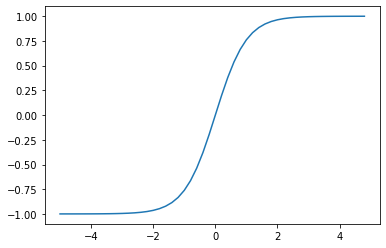

In [11]:
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
plot_function(tanh)

### relu
- 单侧抑制
- 对于线性函数表现好
- 不存在梯度消失的问题

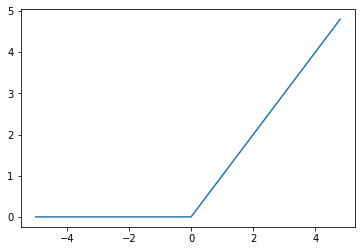

In [12]:
def relu(x):
    return np.maximum(0,x)
plot_function(relu)

## Thinking3 利用梯度下降法训练神经网络，发现模型loss不变，可能有哪些问题？怎么解决？

很可能因为梯度消失了，因为随着神经网络的迭代更新，有些权值可能会出现不更新的现象，尤其是越靠近输入层的，越可能出现梯度消失的情况。想解决这个问题，可以更换激活函数，比如将sigmoid函数换成relu,或者改变权值的初始化方式。

- train loss 不断下降，test loss 不断下降，说明网络仍在学习;
- train loss 不断下降，test loss 趋于不变，说明网络过拟合;
- train loss 趋于不变，test loss 不断下降，说明数据集 100%有问题;
- train loss 趋于不变，test loss 趋于不变，说明学习遇到瓶颈，需要减小学习率或批量数目;
- train loss 不断上升，test loss 不断上升，说明网络结构设计不当，训练超参数设置不当，数据集经过清洗等问题。

参考：
https://blog.ailemon.me/2019/02/26/solution-to-loss-doesnt-drop-in-nn-train/